# Problema da dieta

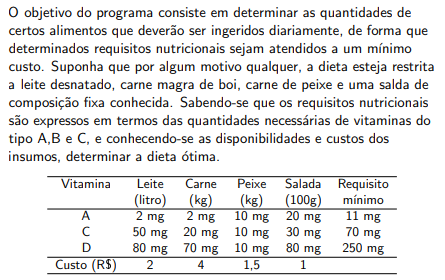

# Modelagem



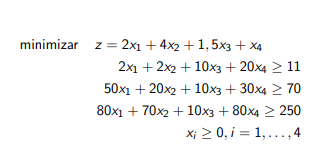

In [11]:
from pyomo.environ import *
from pyomo.opt import SolverStatus, TerminationCondition

In [12]:
m = 3 # vitaminas (linhas)
n = 4  # comidas (colunas)
J = list(range(0,m)) # conjunto de vitaminas
I = list(range(0,n)) # conjunto de comidas
p = [2.0, 4.0, 1.5, 1.0]
y   = [11, 70, 250]
c = [[2.0, 2.0, 10.0, 20.0],
     [50.0, 20.0, 10.0, 30.0],
     [80.0, 70.0, 10.0, 80.0]]

In [13]:
def RestricaoAlimentar(Model,I,j,c,y):
    expressao = sum(Model.x[i] * c[j][i] for i in I) - y[j]
    return expressao >= 0.0

In [14]:
dieta = ConcreteModel()
dieta.x = Var(I,within = NonNegativeReals)
dieta.obj = Objective(expr = sum(p[i] * dieta.x[i] for i in I), sense = minimize)
dieta.atendimento = ConstraintList()
for j in J:
    expressao = RestricaoAlimentar(dieta,I,j,c,y)
    dieta.atendimento.add(expressao)

In [15]:
#solver = SolverFactory('xpress_direct') ## pacote comercial de alto desempenho
solver = SolverFactory('gurobi') ## codigo shareware, gratuito de prog linear inteira
#solver = SolverFactory('ipopt') ## codigo de programaçao não linear, gratuito
solver.solve(dieta,tee = True)
solver.solve(dieta)


custo = value(dieta.obj)
print("Custo total dos alimentos = %5.2f" % custo)
for i in I:    
    print('Alimento',i,"quantidade x = %5.2f" % value(dieta.x[i]))



Set parameter CSManager to value "http://110.22.10.6:61080"
Set parameter CSAuthToken
Compute Server job ID: 24eb78c9-f3f2-4b6c-865a-d62f751f9998
Capacity available on 'SRVAIOPT01' - connecting...
Established HTTP unencrypted connection
Read LP format model from file C:\Users\JEANLU~1.MOT\AppData\Local\Temp\tmpgg8be2t9.pyomo.lp
Reading time = 0.61 seconds
x1: 3 rows, 4 columns, 12 nonzeros
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Gurobi Compute Server Worker version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 3 rows, 4 columns and 12 nonzeros
Model fingerprint: 0xb927785f
Coefficient statistics:
  Matrix range     [2e+00, 8e+01]
  Objective range  [1e+00, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 3e+02]
Presolve removed 0 rows and 2 columns
Presolve time: 0.00s
Presolved: 3 rows, 2 columns, 6 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      T